In [1]:
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [8]:
# Set the path to the dataset
dataset_dir = 'data/Fruit and Vegetable Diseases Dataset'
classes = os.listdir(dataset_dir)
# Create directories for train, val, and test sets
output_dir = 'output_dataset'
os.makedirs(output_dir, exist_ok=True)
os.makedirs(os.path.join(output_dir, 'train'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'val'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'test'), exist_ok=True)

for cls in classes:
    os.makedirs(os.path.join(output_dir, 'train', cls), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'val', cls), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'test', cls), exist_ok=True)

    class_dir = os.path.join(dataset_dir, cls)
    images = os.listdir(class_dir)[:200]  # Get first 200 images (removed [1:] which would skip first image)

    print(cls, len(images))

    # Split images into train, val, and test sets
    train_and_val_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
    train_images, val_images = train_test_split(train_and_val_images, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

    # Copy images to respective directories
    for img in train_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'train', cls, img))
    for img in val_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'val', cls, img))
    for img in test_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'test', cls, img))

print("Dataset split into training, validation, and test sets.")

Apple__Healthy 200
Apple__Rotten 200
Banana__Healthy 200
Banana__Rotten 200
Bellpepper__Healthy 200
Bellpepper__Rotten 200
Carrot__Healthy 200
Carrot__Rotten 200
Cucumber__Healthy 200
Cucumber__Rotten 200
Grape__Healthy 200
Grape__Rotten 200
Guava__Healthy 200
Guava__Rotten 200
Jujube__Healthy 200
Jujube__Rotten 200
Mango__Healthy 200
Mango__Rotten 200
Orange__Healthy 200
Orange__Rotten 200
Pomegranate__Healthy 200
Pomegranate__Rotten 200
Potato__Healthy 200
Potato__Rotten 200
Strawberry__Healthy 200
Strawberry__Rotten 200
Tomato__Healthy 200
Tomato__Rotten 200
Dataset split into training, validation, and test sets.


In [10]:
# Define directories
dataset_dir = 'output_dataset'  # Fixed typo from 'output.dataset' to 'output_dataset'
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'val')
test_dir = os.path.join(dataset_dir, 'test')

# Define image size expected by the pre-trained model
IMG_SIZE = (224, 224)  # Common size for many models like ResNet, VGG, MobileNet

# Create ImageDataGenerators for resizing and augmenting the images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,  # Fixed typo from 'horizontal_file' to 'horizontal_flip'
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load and resize the images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary'  # Assuming binary classification for healthy vs rotten
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Do not shuffle test data
)

# Print class indices for reference
print("Training class indices:", train_generator.class_indices)
print("Validation class indices:", val_generator.class_indices)
print("Test class indices:", test_generator.class_indices)

Found 3355 images belonging to 28 classes.
Found 1120 images belonging to 28 classes.
Found 1120 images belonging to 28 classes.
Training class indices: {'Apple__Healthy': 0, 'Apple__Rotten': 1, 'Banana__Healthy': 2, 'Banana__Rotten': 3, 'Bellpepper__Healthy': 4, 'Bellpepper__Rotten': 5, 'Carrot__Healthy': 6, 'Carrot__Rotten': 7, 'Cucumber__Healthy': 8, 'Cucumber__Rotten': 9, 'Grape__Healthy': 10, 'Grape__Rotten': 11, 'Guava__Healthy': 12, 'Guava__Rotten': 13, 'Jujube__Healthy': 14, 'Jujube__Rotten': 15, 'Mango__Healthy': 16, 'Mango__Rotten': 17, 'Orange__Healthy': 18, 'Orange__Rotten': 19, 'Pomegranate__Healthy': 20, 'Pomegranate__Rotten': 21, 'Potato__Healthy': 22, 'Potato__Rotten': 23, 'Strawberry__Healthy': 24, 'Strawberry__Rotten': 25, 'Tomato__Healthy': 26, 'Tomato__Rotten': 27}
Validation class indices: {'Apple__Healthy': 0, 'Apple__Rotten': 1, 'Banana__Healthy': 2, 'Banana__Rotten': 3, 'Bellpepper__Healthy': 4, 'Bellpepper__Rotten': 5, 'Carrot__Healthy': 6, 'Carrot__Rotten': 7,

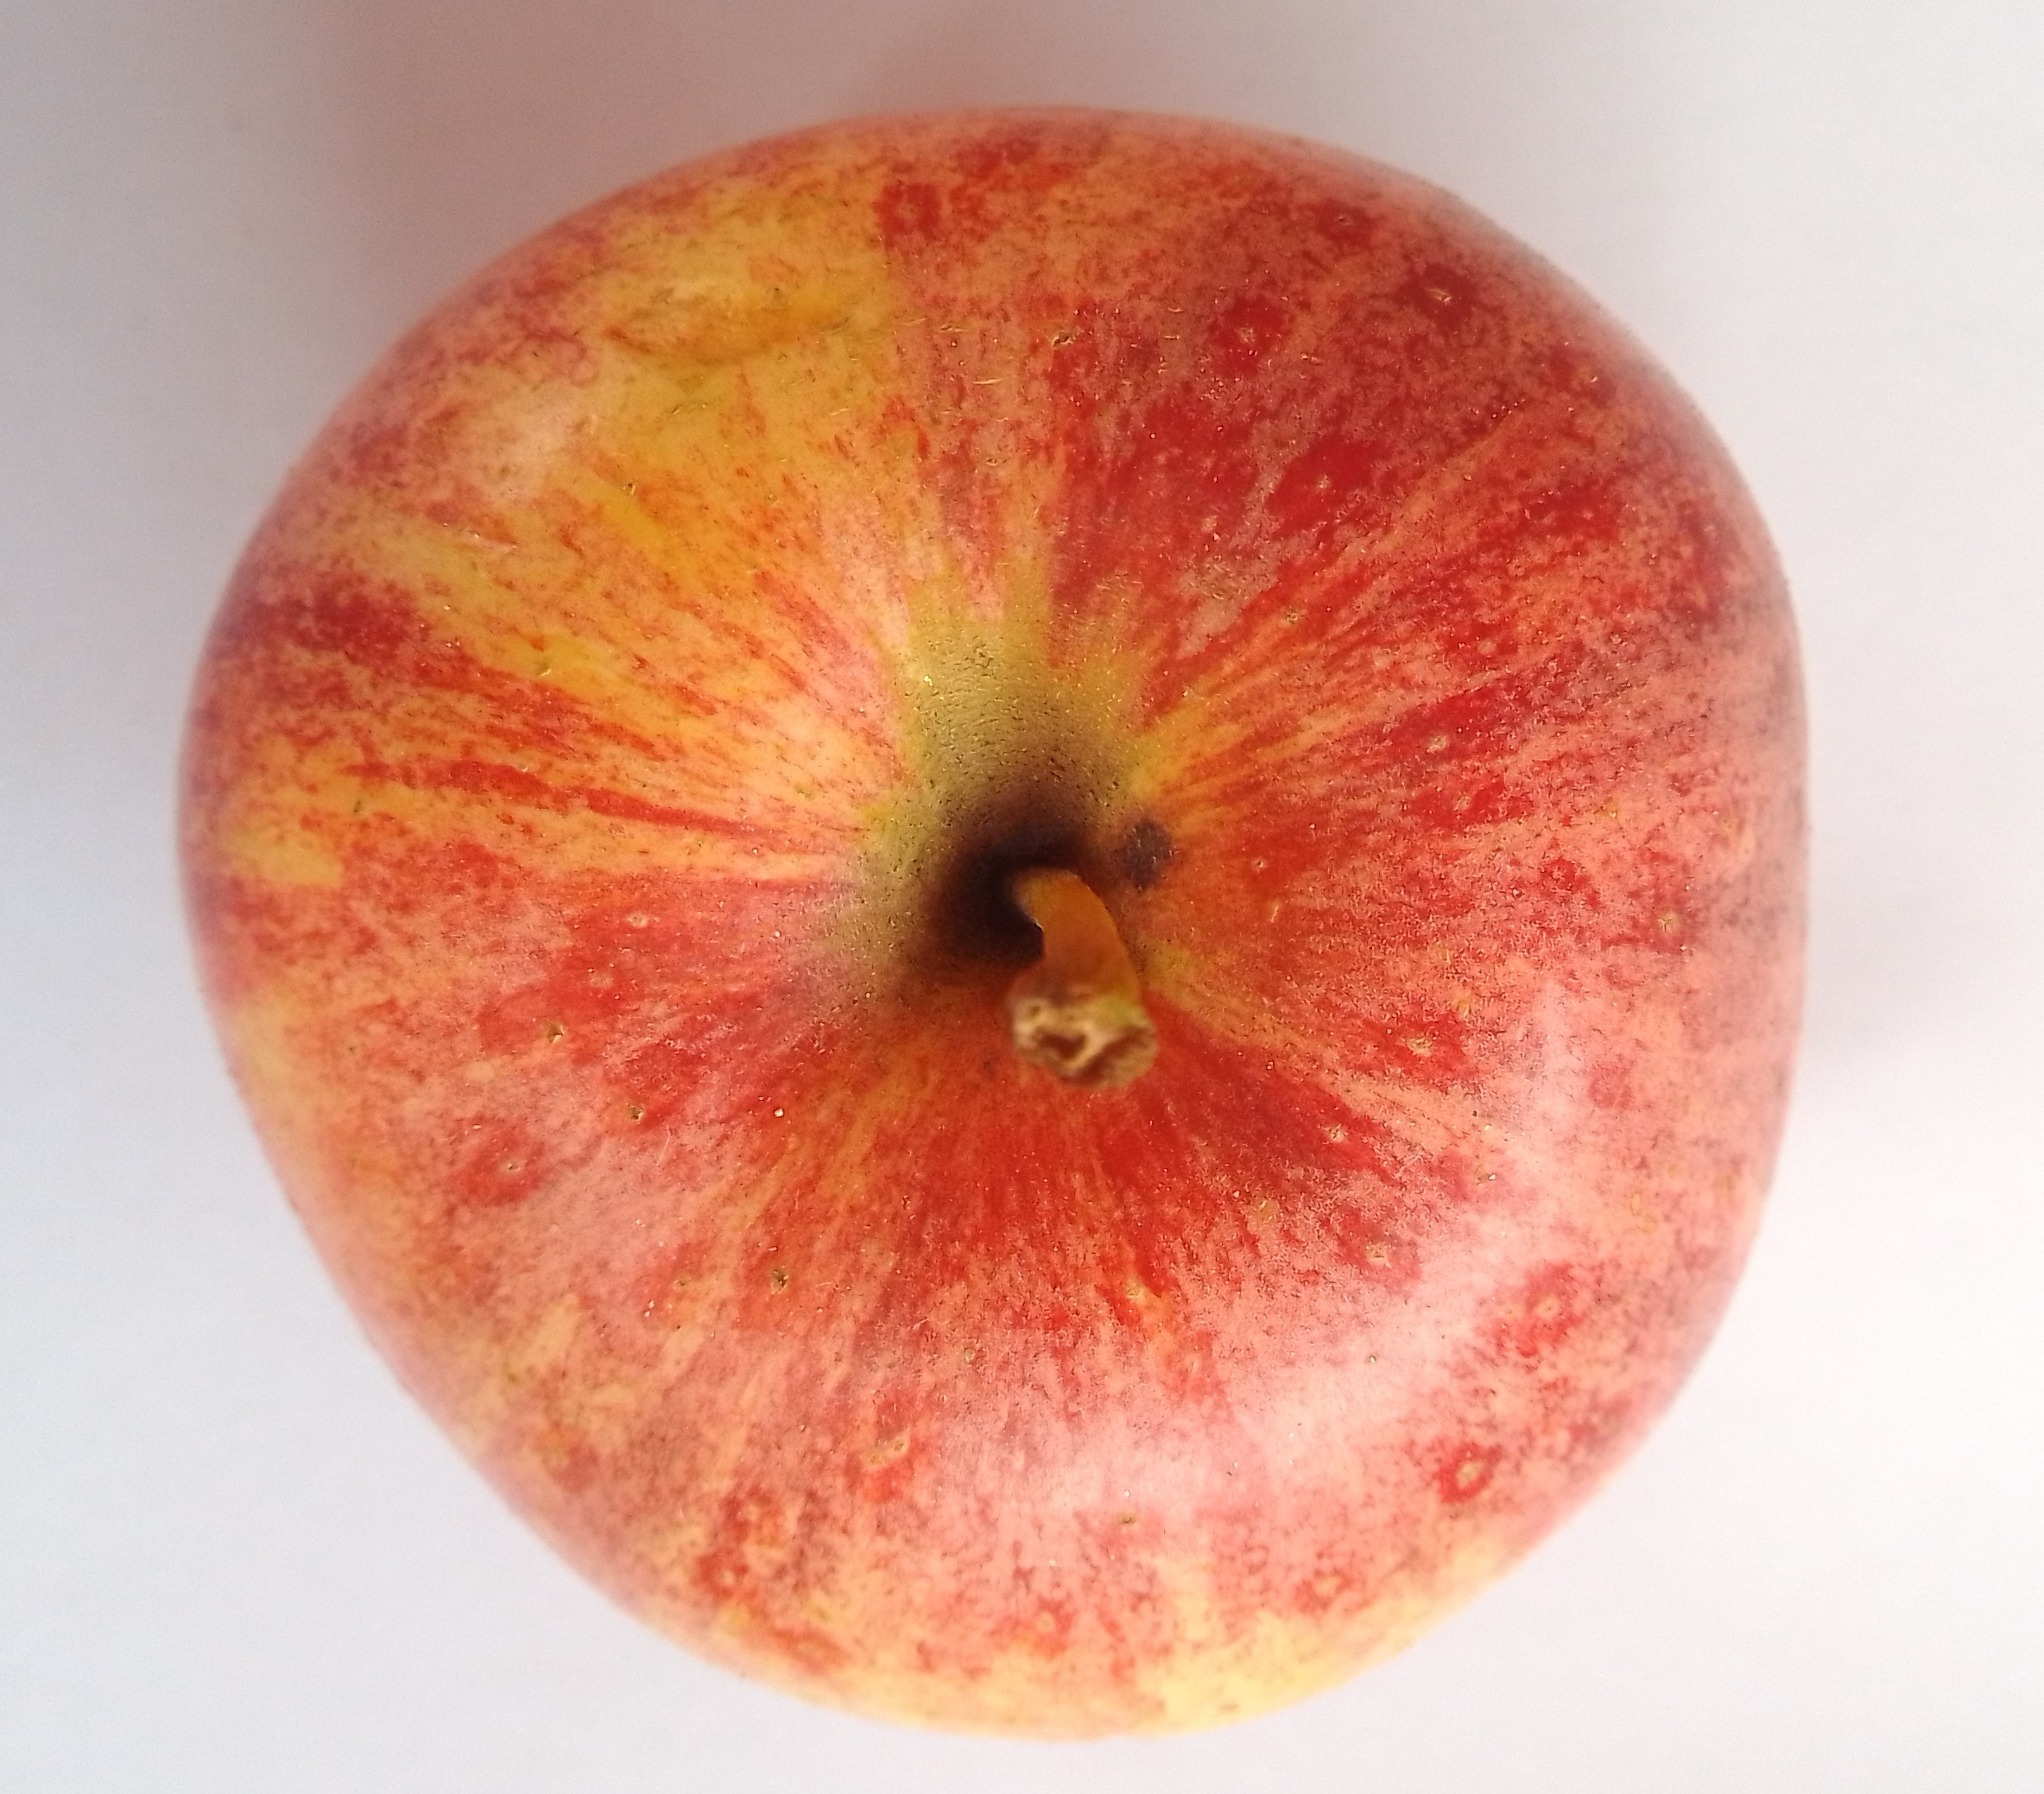

In [22]:
from IPython.display import Image, display
import random
# Specify the path to your image folder
folder_path = 'output_dataset/train/Apple__Healthy'  # Replace with the actual path to your image folder

# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Select a random image from the list
selected_image = random.choice(image_files)

# Display the randomly selected image
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))  # Fixed typo: changed '-' to '='

Displaying random image: 213.jpg


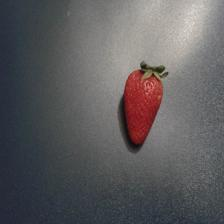

In [28]:
# Specify the path to your image folder
folder_path = 'output_dataset/test/Strawberry__Healthy'  # Replace with your actual path

# Verify the folder exists
if not os.path.exists(folder_path):
    raise FileNotFoundError(f"Folder not found: {folder_path}")

# List all image files in the folder
image_files = [f for f in os.listdir(folder_path) 
              if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

if not image_files:
    raise ValueError(f"No images found in {folder_path}")

# Select and display a random image
selected_image = random.choice(image_files)
image_path = os.path.join(folder_path, selected_image)

print(f"Displaying random image: {selected_image}")
display(Image(filename=image_path))  # Fixed the syntax error (changed '-' to '=')

Displaying random image from: output_dataset/test/Cucumber__Rotten
Selected image: rottenCucumber (256).jpg


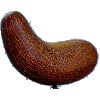

In [30]:
import os
import random
from IPython.display import Image, display

# Specify the path to your image folder
folder_path = 'output_dataset/test/Cucumber__Rotten'  # Fixed path (removed space after underscore)

# Verify the folder exists
if not os.path.exists(folder_path):
    raise FileNotFoundError(f"Directory not found: {folder_path}\n"
                          f"Current working directory: {os.getcwd()}")

# List all image files in the folder (case-insensitive check)
image_files = [f for f in os.listdir(folder_path) 
              if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

if not image_files:
    raise ValueError(f"No images found in {folder_path}\n"
                   f"Supported formats: .jpg, .png, .jpeg")

# Select a random image
selected_image = random.choice(image_files)
image_path = os.path.join(folder_path, selected_image)

# Display the image with metadata
print(f"Displaying random image from: {folder_path}")
print(f"Selected image: {selected_image}")
display(Image(filename=image_path))  # Fixed the '-' to '=' here

Displaying random image from: output_dataset/test/Strawberry__Rotten
Selected image: 201.jpg


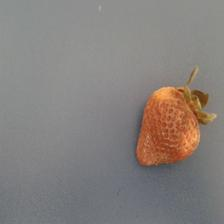

In [32]:
import os
import random
from IPython.display import Image, display

# Specify the path to your image folder
folder_path = 'output_dataset/test/Strawberry__Rotten'  # Fixed double underscore

# Verify the folder exists
if not os.path.exists(folder_path):
    print(f"Error: Folder not found at {folder_path}")
    print(f"Current working directory: {os.getcwd()}")
    print("Available folders in test directory:", os.listdir('output_dataset/test'))
    raise FileNotFoundError("Please check the folder path")

# List all image files in the folder
try:
    image_files = [f for f in os.listdir(folder_path) 
                  if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
    
    if not image_files:
        raise ValueError(f"No images found in {folder_path}")
        
    # Select and display a random image
    selected_image = random.choice(image_files)
    image_path = os.path.join(folder_path, selected_image)
    
    print(f"Displaying random image from: {folder_path}")
    print(f"Selected image: {selected_image}")
    display(Image(filename=image_path))

except Exception as e:
    print(f"An error occurred: {str(e)}")
    print("Please check:")
    print("1. Folder path is correct")
    print("2. Folder contains image files")
    print("3. Image files have .jpg, .png, or .jpeg extensions")

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define paths
train_path = "output_dataset/train"
test_path = "output_dataset/test"

# Verify paths exist
if not os.path.exists(train_path):
    raise FileNotFoundError(f"Training directory not found at {train_path}")
if not os.path.exists(test_path):
    raise FileNotFoundError(f"Test directory not found at {test_path}")

# Data augmentation configuration for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,  # Added horizontal flip for better augmentation
    rotation_range=20,     # Added rotation for more variety
    width_shift_range=0.1, # Added width shifting
    height_shift_range=0.1 # Added height shifting
)

# Validation/test data generator (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),  # Standard size for most CNN models
    batch_size=32,           # More common batch size (can adjust based on your GPU memory)
    class_mode='categorical', # Assuming multi-class classification
    shuffle=True             # Important for training
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False            # Important for testing/validation
)

# Print class information
print("\nTraining data:")
print(f"Found {train_generator.samples} images belonging to {train_generator.num_classes} classes")
print("Class indices:", train_generator.class_indices)

print("\nTest data:")
print(f"Found {test_generator.samples} images belonging to {test_generator.num_classes} classes")
print("Class indices:", test_generator.class_indices)

Found 3355 images belonging to 28 classes.
Found 1120 images belonging to 28 classes.

Training data:
Found 3355 images belonging to 28 classes
Class indices: {'Apple__Healthy': 0, 'Apple__Rotten': 1, 'Banana__Healthy': 2, 'Banana__Rotten': 3, 'Bellpepper__Healthy': 4, 'Bellpepper__Rotten': 5, 'Carrot__Healthy': 6, 'Carrot__Rotten': 7, 'Cucumber__Healthy': 8, 'Cucumber__Rotten': 9, 'Grape__Healthy': 10, 'Grape__Rotten': 11, 'Guava__Healthy': 12, 'Guava__Rotten': 13, 'Jujube__Healthy': 14, 'Jujube__Rotten': 15, 'Mango__Healthy': 16, 'Mango__Rotten': 17, 'Orange__Healthy': 18, 'Orange__Rotten': 19, 'Pomegranate__Healthy': 20, 'Pomegranate__Rotten': 21, 'Potato__Healthy': 22, 'Potato__Rotten': 23, 'Strawberry__Healthy': 24, 'Strawberry__Rotten': 25, 'Tomato__Healthy': 26, 'Tomato__Rotten': 27}

Test data:
Found 1120 images belonging to 28 classes
Class indices: {'Apple__Healthy': 0, 'Apple__Rotten': 1, 'Banana__Healthy': 2, 'Banana__Rotten': 3, 'Bellpepper__Healthy': 4, 'Bellpepper__Rotte

In [36]:
# Load VGG16 model
vgg = VGG16(include_top=False, input_shape=(224, 224, 3))

# Freeze all layers
for layer in vgg.layers:
    layer.trainable = False

# Add custom layers
x = Flatten()(vgg.output)
output = Dense(28, activation='softmax')(x)  # 28 classes based on your dataset

# Create final model
vgg16 = Model(vgg.input, output)

# Print model summary
vgg16.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 28)             │       702,492 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,417,180 (58.81 MB)

 Trainable params: 702,492 (2.68 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [38]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

# Initialize optimizer with correct parameter name
opt = Adam(learning_rate=0.0001)  # Fixed 'I=' to 'learning_rate='

# Define Early Stopping callback
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

# Compile the model
vgg16.compile(
    optimizer=opt,  # Use the optimizer instance we created
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model with early stopping callback
history = vgg16.fit(
    train_generator,  # Use the generator variable name from previous code
    validation_data=test_generator,  # Fixed '-' to '='
    epochs=15,
    steps_per_epoch=len(train_generator),  # Better than hardcoded 20
    validation_steps=len(test_generator),
    callbacks=[early_stopping],
    verbose=1
)

# Save the trained model
vgg16.save('healthy_vs_rotten.h5')  # Added .h5 extension
print("Model saved as 'healthy_vs_rotten.h5'")

# Print training summary
print("\nTraining Summary:")
print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")

C:\Users\amarn\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
 81/105 ━━━━━━━━━━━━━━━━━━━━ 3:32 9s/step - accuracy: 0.2001 - loss: 2.9215

C:\Users\amarn\anaconda3\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


105/105 ━━━━━━━━━━━━━━━━━━━━ 1227s 12s/step - accuracy: 0.2417 - loss: 2.7919 - val_accuracy: 0.6402 - val_loss: 1.4826
Epoch 2/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 1171s 11s/step - accuracy: 0.6573 - loss: 1.4631 - val_accuracy: 0.7170 - val_loss: 1.0350
Epoch 3/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 1164s 11s/step - accuracy: 0.7492 - loss: 1.0330 - val_accuracy: 0.8054 - val_loss: 0.8068
Epoch 4/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 1159s 11s/step - accuracy: 0.8065 - loss: 0.8440 - val_accuracy: 0.8241 - val_loss: 0.6906
Epoch 5/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 1167s 11s/step - accuracy: 0.8507 - loss: 0.6732 - val_accuracy: 0.8366 - val_loss: 0.6315
Epoch 6/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 1201s 11s/step - accuracy: 0.8558 - loss: 0.6134 - val_accuracy: 0.8375 - val_loss: 0.5865
Epoch 7/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 1307s 12s/step - accuracy: 0.8698 - loss: 0.5831 - val_accuracy: 0.8616 - val_loss: 0.5241
Epoch 8/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 1204s 11s/step - accuracy: 0.8870 - loss: 0.5038 - val

Model saved as 'healthy_vs_rotten.h5'

Training Summary:
Final Training Accuracy: 0.9386
Final Validation Accuracy: 0.8902


In [40]:
vgg16.save('healthy_vs_rotten.keras') 

In [48]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input

# Define class labels based on your actual classes
class_labels = {
    0: 'Apple_Healthy', 1: 'Apple_Rotten',
    2: 'Banana_Healthy', 3: 'Banana_Rotten',
    4: 'Bellpepper_Healthy', 5: 'Bellpepper_Rotten',
    6: 'Carrot_Healthy', 7: 'Carrot_Rotten',
    8: 'Cucumber_Healthy', 9: 'Cucumber_Rotten',
    10: 'Grape_Healthy', 11: 'Grape_Rotten',
    12: 'Guava_Healthy', 13: 'Guava_Rotten',
    14: 'Jujube_Healthy', 15: 'Jujube_Rotten',
    16: 'Mango_Healthy', 17: 'Mango_Rotten',
    18: 'Orange_Healthy', 19: 'Orange_Rotten',
    20: 'Pomegranate_Healthy', 21: 'Pomegranate_Rotten',
    22: 'Potato_Healthy', 23: 'Potato_Rotten',
    24: 'Strawberry_Healthy', 25: 'Strawberry_Rotten',
    26: 'Tomato_Healthy', 27: 'Tomato_Rotten'
}

def predict_and_display(model, img_path):
    """Predict and display results for a single image"""
    # Load and preprocess image
    img = load_img(img_path, target_size=(224, 224))
    x = img_to_array(img)
    x = preprocess_input(x)
    x = np.expand_dims(x, axis=0)
    
    # Make prediction
    preds = model.predict(x)
    class_idx = np.argmax(preds)
    confidence = np.max(preds)
    class_name = class_labels[class_idx]
    
    # Display results
    print(f"\nImage: {img_path}")
    print(f"Predicted: {class_name} (Class {class_idx})")
    print(f"Confidence: {confidence*100:.2f}%")
    #print("All predictions:", preds)
    
    return class_idx, confidence

# Test Case 1: Healthy Bell Pepper
img1 = 'output_dataset/train/Bellpepper__Healthy/freshPepper (104).jpg'
class1, conf1 = predict_and_display(vgg16, img1)

# Test Case 2: Rotten Mango
img2 = 'output_dataset/train/Mango__Rotten/153.jpg'
class2, conf2 = predict_and_display(vgg16, img2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step

Image: output_dataset/train/Bellpepper__Healthy/freshPepper (104).jpg
Predicted: Bellpepper_Healthy (Class 4)
Confidence: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step

Image: output_dataset/train/Mango__Rotten/153.jpg
Predicted: Mango_Rotten (Class 17)
Confidence: 100.00%


In [58]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input

# Define class labels based on your model's classes
class_labels = {
    0: 'Apple_Healthy', 1: 'Apple_Rotten',
    2: 'Banana_Healthy', 3: 'Banana_Rotten',
    4: 'Bellpepper_Healthy', 5: 'Bellpepper_Rotten',
    6: 'Carrot_Healthy', 7: 'Carrot_Rotten',
    8: 'Cucumber_Healthy', 9: 'Cucumber_Rotten',
    10: 'Grape_Healthy', 11: 'Grape_Rotten',
    12: 'Guava_Healthy', 13: 'Guava_Rotten',
    14: 'Jujube_Healthy', 15: 'Jujube_Rotten',
    16: 'Mango_Healthy', 17: 'Mango_Rotten',
    18: 'Orange_Healthy', 19: 'Orange_Rotten',
    20: 'Pomegranate_Healthy', 21: 'Pomegranate_Rotten',
    22: 'Potato_Healthy', 23: 'Potato_Rotten',
    24: 'Strawberry_Healthy', 25: 'Strawberry_Rotten',
    26: 'Tomato_Healthy', 27: 'Tomato_Rotten'
}

def predict_and_display(model, img_path):
    """Predict and display results for a single image"""
    try:
        # Load and preprocess image
        img = load_img(img_path, target_size=(224, 224))
        x = img_to_array(img)
        x = preprocess_input(x)
        x = np.expand_dims(x, axis=0)
        
        # Make prediction
        preds = model.predict(x)
        class_idx = np.argmax(preds)
        confidence = np.max(preds)
        class_name = class_labels.get(class_idx, f"Unknown class {class_idx}")
        
        # Display results
        print(f"\nImage: {img_path}")
        print(f"Predicted: {class_name} (Class {class_idx})")
        print(f"Confidence: {confidence*100:.2f}%")
        #print("Top predictions:", preds)
        
        return class_idx, confidence
    
    except Exception as e:
        print(f"\nError processing {img_path}: {str(e)}")
        return None, None

# Test Case 3: Healthy Orange
img3 = 'output_dataset/train/Orange__Healthy/freshOrange (174).jpg'
class3, conf3 = predict_and_display(vgg16, img3)

# Test Case 4: Healthy Cucumber (fixed typo from 'Lucumber')
img4 = 'output_dataset/train/Cucumber__Healthy/freshCucumber (127).jpg'
class4, conf4 = predict_and_display(vgg16, img4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step

Image: output_dataset/train/Orange__Healthy/freshOrange (174).jpg
Predicted: Guava_Healthy (Class 12)
Confidence: 99.40%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step

Image: output_dataset/train/Cucumber__Healthy/freshCucumber (127).jpg
Predicted: Cucumber_Healthy (Class 8)
Confidence: 100.00%


In [60]:
def predict_image(model, img_path):
    """Predict and display image classification results"""
    try:
        # Load and preprocess image
        img = load_img(img_path, target_size=(224, 224))
        x = img_to_array(img)
        x = preprocess_input(x)
        x = np.expand_dims(x, axis=0)
        
        # Make prediction
        preds = model.predict(x)
        class_idx = np.argmax(preds)
        confidence = np.max(preds)
        
        # Get class name
        class_name = class_labels.get(class_idx, f"Unknown class {class_idx}")
        
        # Display results
        print(f"\nImage: {img_path}")
        print(f"Predicted class: {class_name} (Index: {class_idx})")
        print(f"Confidence: {confidence:.2%}")
        print("All predictions:", preds)
        
        return class_idx, confidence
    
    except Exception as e:
        print(f"\nError processing image: {str(e)}")
        return None, None

# Test Case 5: Pomegranate_Rotten
img_path = 'output_dataset/train/Pomegranate__Rotten/rottenPomegranate (1).jpg'  # Corrected path
class_idx, confidence = predict_image(vgg16, img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step

Image: output_dataset/train/Pomegranate__Rotten/rottenPomegranate (1).jpg
Predicted class: Pomegranate_Rotten (Index: 21)
Confidence: 100.00%
All predictions: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0.]]
